In [1]:
import pandas as pd
ldnhouse_df=pd.read_csv("/Users/admin/Downloads/London.csv")
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [9]:
ldnhouse_df.shape

(3480, 11)

In [6]:
ldnhouse_df.dtypes

Unnamed: 0            int64
Property Name        object
Price                 int64
House Type           object
Area in sq ft         int64
No. of Bedrooms       int64
No. of Bathrooms      int64
No. of Receptions     int64
Location             object
City/County          object
Postal Code          object
dtype: object

In [2]:
# Set the display option to show all rows
pd.set_option('display.max_rows', None)

# Display the sum of null values for each column
print(ldnhouse_df.isnull().sum())

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64


In [3]:
# Set the display option to show all rows and cols

pd.set_option('display.max_rows', None)
# Display the sum of null values for each column 
print(ldnhouse_df.isnull())

      Unnamed: 0  Property Name  Price  House Type  Area in sq ft  \
0          False          False  False       False          False   
1          False          False  False       False          False   
2          False          False  False       False          False   
3          False          False  False       False          False   
4          False          False  False       False          False   
5          False          False  False       False          False   
6          False          False  False       False          False   
7          False          False  False       False          False   
8          False          False  False       False          False   
9          False          False  False       False          False   
10         False          False  False       False          False   
11         False          False  False       False          False   
12         False          False  False       False          False   
13         False          False  F

In [7]:
print(ldnhouse_df['Location'].isnull())

0       False
1       False
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9        True
10       True
11      False
12      False
13      False
14      False
15      False
16       True
17      False
18      False
19       True
20       True
21      False
22      False
23       True
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31       True
32       True
33       True
34      False
35      False
36      False
37       True
38      False
39      False
40       True
41       True
42       True
43      False
44       True
45       True
46       True
47      False
48      False
49      False
50      False
51       True
52      False
53      False
54      False
55      False
56      False
57      False
58      False
59       True
60      False
61       True
62       True
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [8]:
ldnhouse_df[ldnhouse_df['Location'].isnull()]

Unnamed: 0                      Property Name     Price  \
5              5                Craven Hill Gardens    420000   
6              6                     Alfriston Road   1475000   
8              8                    Adam & Eve Mews   2500000   
9              9                     Hornton Street    925000   
10            10                    Drakefield Road   2400000   
16            16                     Cambridge Park   1450000   
19            19                      St. Anns Road   1075000   
20            20                       Clapham Road    500000   
23            23               Campden Hill Gardens   1175000   
31            31                      Fernside Road   1200000   
32            32                     Telford Avenue   1250000   
33            33                     Telford Avenue    695000   
37            37                      Hobury Street    975000   
40            40                        Khyber Road    925000   
41            41                        Coles Court    650000   
42            42           Prince Of Wales Mansions    550000   
44            44                     Kersley Street   1850000   
45            45              Battersea Bridge Road    525000   
46            46                      Larkhall Rise   2200000   
51            51                       Eaton Square   5250000   
59            59                        Harbut Road    735000   
61            61                    Fernwood Avenue   1250000   
62            62                     Havilland Mews    595000   
71            71                          The Chase    480000   
76            76                        Lysias Road   1300000   
80            80                      Walton Street   5950000   
81            81                        Chatto Road   1325000   
82            82                   Redcliffe Square   1250000   
83            83                      Elm Park Lane   2300000   
85            85                     Haverhill Road   1350000   
87            87              St. Stephens Crescent    795000   
92            92                   Sycamore Gardens    680000   
93            93                  Quarrendon Street   2300000   
96            96                     Sisters Avenue    500000   
98            98                    Pembroke Villas   4500000   
102          102                     Kersley Street   2350000   
106          106                        Klea Avenue   1795000   
107          107                  Manor Place Depot    687500   
108          108                    Molyneux Street   2450000   
112          112                     Belsize Square    780000   
115          115                        Milton Road    900000   
116          116                    Drakefield Road   2500000   
118          118                      Bewick Street   1250000   
123          123                   Freshford Street   1200000   
128          128                     Gleneldon Road   1850000   
132          132                       Haldane Road   1250000   
137          137                       Newstead Way   1495000   
139          139                        Melody Road   1625000   
140          140                      Hasker Street   3150000   
145          145          Clapham Common South Side    800000   
147          147                     Cadogan Square   2200000   
148          148                     Cadogan Square   1175000   
149          149                        Aubrey Walk   9500000   
159          159                       Balham Grove   1200000   
160          160                      Fernside Road   1500000   
161          161                   Walsingham Place   2250000   
162          162                     Englewood Road   1500000   
163          163                 Streathbourne Road   2150000   
164          164                       Rowfant Road   1595000   
165          165                     Tantallon Road   1565000   
166          166                    Honey

In [10]:
unique_property_names = ldnhouse_df['Property Name'].unique()
print("Different objects in 'Property Name' category:", unique_property_names)

Different objects in 'Property Name' category: ['Queens Road' 'Seward Street' 'Hotham Road' ... 'Chelsea Crescent'
 "Queen's Gate" 'One Lillie Square']


In [11]:
unique_property_names_count = ldnhouse_df['Property Name'].nunique()
print("Number of unique objects in 'Property Name' category:", unique_property_names_count)

Number of unique objects in 'Property Name' category: 2380


In [12]:
unique_locations = ldnhouse_df['Location'].unique()
print("Different objects in 'Location' category:", unique_locations)

Different objects in 'Location' category: ['Wimbledon' 'Clerkenwell' 'Putney' nan ' Fulham' 'Highgate'
 'Walton-on-Thames' " St. John's Wood" '17 Abercorn Place' 'Regents Park'
 ' Coulsdon' 'Primrose Hill' 'Marylebone' '10 Draycott Avenue' 'Islington'
 ' Islington' 'South Hampstead' 'Belsize Park' 'Esher' ' Surbiton'
 '20-21 Wetherby Gardens' 'Chiswick' 'Barnes' 'Fulham' ' Battersea'
 ' Victoria' 'South Hackney' 'Grove End Road' 'Crouch End' ' Downs Road'
 'Coleridge Gardens' 'Battersea' 'Chelsea Harbour' ' Bayswater' 'Tooting'
 'Watford' 'Northwood' 'Morgan Street' "Regent's Park" 'Kentish Town'
 "St John's Wood" ' Ealing' 'Thames Ditton' 'Kidbrooke' 'Westminster'
 'Hackney' ' Canary Wharf' 'Woodford Green' ' Westminster' 'Surbiton'
 'Little Venice' 'Hampstead' ' Hampstead' "St. James's" '410 Strand'
 'Loughton' 'Barnsbury' 'Prince of Wales Drive' 'Wandsworth'
 '131 Ladbroke Grove' ' City Of London' ' Esher' ' South Bank'
 ' The Otto Buildings' 'Woodstock Road' 'Kingston upon Thames' 

In [13]:
unique_locations_count = ldnhouse_df['Location'].nunique()
print("Number of unique objects in 'Location' category:", unique_locations_count)

Number of unique objects in 'Location' category: 656


In [15]:
unique_counties = ldnhouse_df['City/County'].unique()
print("Different objects in 'City/County' category:", unique_counties)

Different objects in 'City/County' category: ['London' 'Surrey' 'Twickenham' 'Holland Park' 'Battersea' 'Clapton'
 'Hertfordshire' 'Middlesex' 'Essex' 'Downs Road' 'Thurleigh Road'
 'E5 8DE' 'De Beauvoir' 'Wandsworth' 'Clerkenwell' 'Deptford' 'Ealing'
 'Northwood' 'Blackheath' 'Fulham' 'Richmond' 'The Metal Works' 'N7 6QX'
 'City Of London' 'Chessington' '82-88 Fulham High Street' 'Little Venice'
 'Spitalfields' 'Fulham High Street' '27 Carlton Drive' 'Fitzrovia'
 'Chelsea' 'Marylebone' '52 Holloway Road' 'Kent' 'London1500'
 'Wornington Road' 'Thames Ditton' 'Watford' 'Surrey Quays'
 '110 Battersea Park Road' 'Bushey' '311 Goldhawk Road' '6 Deal Street'
 'Kensington' 'Middx' 'Lambourne End' 'Romford' 'Queens Park'
 'Richmond Hill' '4 Circus Road West' 'Hornchurch' 'N1 6FU' 'Oxshott'
 'Greenford' 'Wimbledon' 'Lillie Square']


In [16]:
unique_counties_count = ldnhouse_df['City/County'].nunique()
print("Number of unique objects in 'City/County' category:", unique_counties_count)

Number of unique objects in 'City/County' category: 57


In [17]:
unique_postal_codes = ldnhouse_df['Postal Code'].unique()
print("Different objects in 'Postal Code' category:", unique_postal_codes)

Different objects in 'Postal Code' category: ['SW19 8NY' 'EC1V 3PA' 'SW15 1QL' ... 'NW11 6TG' 'W1S 3AR' 'N6 4LP']


In [18]:
unique_postal_codes_count = ldnhouse_df['Postal Code'].nunique()
print("Number of unique objects in 'Postal Code' category:", unique_postal_codes_count)

Number of unique objects in 'Postal Code' category: 2845


In [19]:
ldnhouse_df[["Postal Code 1","Postal Code 2","Postal Code 3"]] = ldnhouse_df["Postal Code"].str.split(' ',expand=True)

In [20]:
ldnhouse_df.drop(columns = "Postal Code 3", inplace=True)

In [21]:
ldnhouse_df['Postal Code 3'] = ldnhouse_df['Postal Code 2'].str[0]

In [22]:
ldnhouse_df['Postal Code 4'] = ldnhouse_df["Postal Code 1"] + " " + ldnhouse_df["Postal Code 3"]

In [23]:
# Create a new column to store the extracted initials
ldnhouse_df['Postal Code 5'] = ldnhouse_df['Postal Code'].str.extract(r'^(\D+)')

# Display the DataFrame with the new column
ldnhouse_df

Unnamed: 0                        Property Name     Price  \
0              0                          Queens Road   1675000   
1              1                        Seward Street    650000   
2              2                          Hotham Road    735000   
3              3                         Festing Road   1765000   
4              4                         Spencer Walk    675000   
5              5                  Craven Hill Gardens    420000   
6              6                       Alfriston Road   1475000   
7              7                         Bishops Gate    650000   
8              8                      Adam & Eve Mews   2500000   
9              9                       Hornton Street    925000   
10            10                      Drakefield Road   2400000   
11            11                      Cromwell Avenue   2500000   
12            12                   Ashley Park Avenue   2795000   
13            13                      Grove End House    725000   
14            14                    Abercorn Mansions    750000   
15            15                      Chester Terrace  12500000   
16            16                       Cambridge Park   1450000   
17            17                       Hazelwood Lane   1250000   
18            18                       Elsworthy Rise   2275000   
19            19                        St. Anns Road   1075000   
20            20                         Clapham Road    500000   
21            21                     Devonshire Close   5500000   
22            22                         The Draycott   8950000   
23            23                 Campden Hill Gardens   1175000   
24            24                        College Cross    550000   
25            25                      St Mary's Grove   1300000   
26            26                    Goldhurst Terrace    800000   
27            27                      Upper Park Road   3500000   
28            28                         Ditton Grove    374950   
29            29                       Roymount Court    400000   
30            30                       Wetherby House   1100000   
31            31                        Fernside Road   1200000   
32            32                       Telford Avenue   1250000   
33            33                       Telford Avenue    695000   
34            34                   Stile Hall Gardens   1735000   
35            35                      Wavendon Avenue   2350000   
36            36                            Duke Road   1200000   
37            37                        Hobury Street    975000   
38            38                       Maltings Close    850000   
39            39                         Munster Road   1599950   
40            40                          Khyber Road    925000   
41            41                          Coles Court    650000   
42            42             Prince Of Wales Mansions    550000   
43            43                  Old Battersea House   9975000   
44            44                       Kersley Street   1850000   
45            45                Battersea Bridge Road    525000   
46            46                        Larkhall Rise   2200000   
47            47                   Ashley Park Avenue   3450000   
48            48                    Carlisle Mansions   1999999   
49            49                           Park Close    725000   
50            50                        Century Court   1750000   
51            51                         Eaton Square   5250000   
52            52                    Hornsey Town Hall   1250000   
53            53                    The oTTo, Hackney    490000   
54            54                        Francis House   3350000   
55            55                        Wendle Square   1000000   
56            56                         Rectory Road   2350000   
57            57                          Thames Quay   2095000   
58            58               Prince Edward Mansions

Postcode Area:

In [27]:
unique_postalcode5_count = ldnhouse_df['Postal Code 5'].nunique()
print("Number of unique objects in 'Postal Code 5' category:", unique_postalcode5_count)

Number of unique objects in 'Postal Code 5' category: 20


Postcode District:

In [25]:
unique_postalcode1_count = ldnhouse_df['Postal Code 1'].nunique()
print("Number of unique objects in 'Postal Code 1' category:", unique_postalcode1_count)

Number of unique objects in 'Postal Code 1' category: 154


Postcode Sector:

In [26]:
unique_postalcode4_count = ldnhouse_df['Postal Code 4'].nunique()
print("Number of unique objects in 'Postal Code 4' category:", unique_postalcode4_count)

Number of unique objects in 'Postal Code 4' category: 448


In [29]:
le = LabelEncoder()

encoded_data = ldnhouse_df.copy()
encoded_data = encoded_data.apply(le.fit_transform)

In [30]:
encoded_data.head()

Unnamed: 0  Property Name  Price  House Type  Area in sq ft  \
0           0           1739    287           3           1562   
1           1           1888    110           2            356   
2           2           1147    132           2            305   
3           3            850    298           3           1195   
4           4           1945    115           2            255   

   No. of Bedrooms  No. of Bathrooms  No. of Receptions  Location  \
0                5                 5                  5       650   
1                2                 2                  2       384   
2                2                 2                  2       558   
3                4                 4                  4       558   
4                2                 2                  2       558   

   City/County  Postal Code  Postal Code 1  Postal Code 2  Postal Code 3  \
0           33         1776             90           1634              8   
1           33          291             19            752              3   
2           33         1448             86            350              1   
3           33         1438             86            306              1   
4           33         1442             86            333              1   

   Postal Code 4  Postal Code 5  
0            258             14  
1             58              4  
2            232             14  
3            232             14  
4            232             14

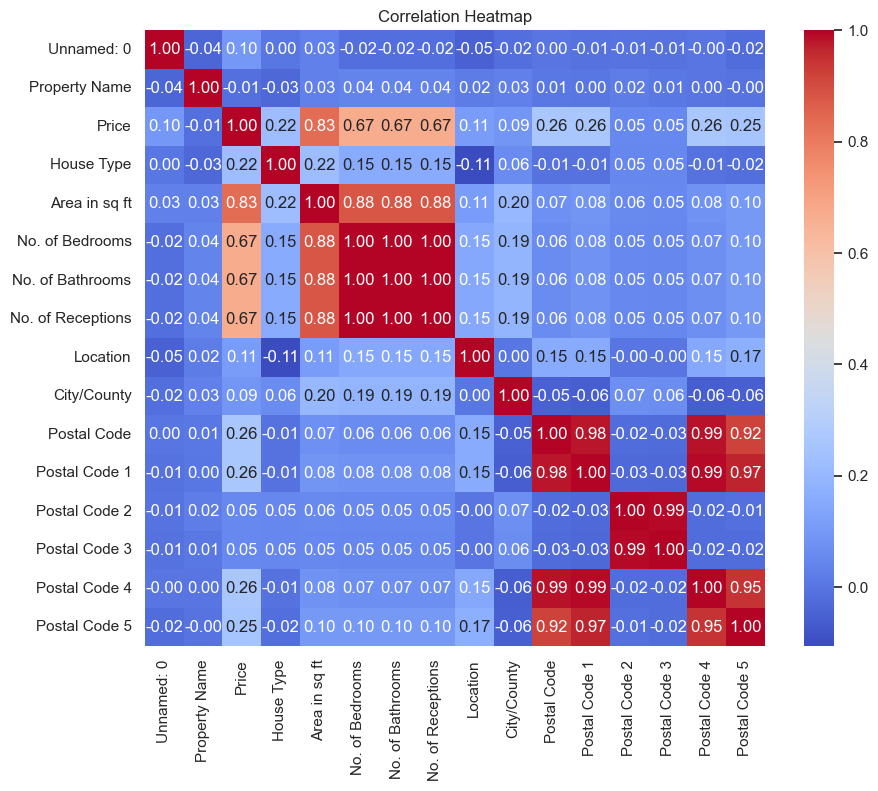

In [34]:
# Compute the correlation matrix
correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [35]:
# Make a copy of the DataFrame w all columns, ldnhouse_df_copy contains the original DataFrame with all columns
default_df = encoded_data.copy() # can call either, ldnhouse_df is now updated

In [36]:
# List of columns to drop
columns_to_drop_models1 = ['Unnamed: 0', 'Property Name', 'Location', 'City/County',
                   'Postal Code', 'Postal Code 1', 'Postal Code 2',
                   'Postal Code 3', 'Postal Code 4', 'No. of Bathrooms', 'No. of Receptions']
columns_to_drop_models2 = ['Unnamed: 0', 'Property Name', 'Location', 'City/County',
                   'Postal Code', 'Postal Code 2', 'Postal Code 3',
                   'Postal Code 4', 'Postal Code 5', 'No. of Bathrooms', 'No. of Receptions']
columns_to_drop_models3 = ['Unnamed: 0', 'Property Name', 'Location', 'City/County',
                   'Postal Code', 'Postal Code 2', 'Postal Code 3',
                   'Postal Code 4', 'Postal Code 5', 'No. of Bedrooms', 'No. of Bathrooms', 'No. of Receptions']

# LRModel.fit(x_train = default_fd.drop(columns = columns_to_drop))

# Create a copy of the default dataframe for model 1 and drop columns
models1_df = default_df.copy()
models1_df = models1_df.drop(columns=columns_to_drop_models1)

# Create a copy of the default dataframe for model 2 and drop columns
models2_df = default_df.copy()
models2_df = models2_df.drop(columns=columns_to_drop_models2)

# Create a copy of the default dataframe for model 2 and drop columns
models3_df = default_df.copy()
models3_df = models3_df.drop(columns=columns_to_drop_models3)

In [37]:
models1_df

Price  House Type  Area in sq ft  No. of Bedrooms  Postal Code 5
0       287           3           1562                5             14
1       110           2            356                2              4
2       132           2            305                2             14
3       298           3           1195                4             14
4       115           2            255                2             14
5        37           2             23                1             17
6       264           3            915                4             14
7       110           5            129                1             14
8       360           3            751                3             17
9       185           2            204                2             17
10      355           3           1747                6             14
11      360           3           1648                6              9
12      376           3           1956                5              8
13      130           2            320                2             10
14      136           2            205                2             10
15      510           3           1908                6             10
16      261           2           1012                3             15
17      233           3           1768                6              2
18      345           5            652                3             10
19      208           1            403                2             17
20       64           2            160                1             14
21      457           3           1664                4             17
22      498           5           1699                4             14
23      222           2            308                2             17
24       78           2             67                1              9
25      242           3            601                3              9
26      154           2            656                3             10
27      410           3           1378                4             10
28       22           5            222                2              8
29       32           2            347                2              8
30      214           2            148                2             14
31      227           3            881                4             14
32      233           3            891                4             14
33      121           2            474                3             14
34      296           3           1259                4             17
35      350           3           1360                5             17
36      227           3            787                4             17
37      194           2            295                2             14
38      165           3            656                3             14
39      280           3           1133                4             14
40      185           2            762                2             14
41      110           2            405                3             14
42       78           2            228                1             14
43      504           3           2020               10             14
44      309           3           1153                5             14
45       69           5            153                1             14
46      341           3           1330                4             14
47      407           3           1970                6              8
48      329           2            956                3             14
49      130           3            419                3              3
50      297           2            696                2             10
51      451           2           1361                3             14
52      233           5            750                3              9
53       58           5            138                1              3
54      401           6           1301                3             14
55      201           2       

In [38]:
models2_df

Price  House Type  Area in sq ft  No. of Bedrooms  Postal Code 1
0       287           3           1562                5             90
1       110           2            356                2             19
2       132           2            305                2             86
3       298           3           1195                4             86
4       115           2            255                2             86
5        37           2             23                1            135
6       264           3            915                4             82
7       110           5            129                1            104
8       360           3            751                3            141
9       185           2            204                2            141
10      355           3           1747                6             88
11      360           3           1648                6             54
12      376           3           1956                5             38
13      130           2            320                2             65
14      136           2            205                2             65
15      510           3           1908                6             57
16      261           2           1012                3            108
17      233           3           1768                6              2
18      345           5            652                3             61
19      208           1            403                2            121
20       64           2            160                1            107
21      457           3           1664                4            127
22      498           5           1699                4            101
23      222           2            308                2            141
24       78           2             67                1             49
25      242           3            601                3             49
26      154           2            656                3             63
27      410           3           1378                4             61
28       22           5            222                2             37
29       32           2            347                2             45
30      214           2            148                2            103
31      227           3            881                4             83
32      233           3            891                4             99
33      121           2            474                3             99
34      296           3           1259                4            137
35      350           3           1360                5            137
36      227           3            787                4            137
37      194           2            295                2             81
38      165           3            656                3             84
39      280           3           1133                4            104
40      185           2            762                2             82
41      110           2            405                3             82
42       78           2            228                1             82
43      504           3           2020               10             82
44      309           3           1153                5             82
45       69           5            153                1             82
46      341           3           1330                4            102
47      407           3           1970                6             38
48      329           2            956                3             94
49      130           3            419                3             14
50      297           2            696                2             65
51      451           2           1361                3             96
52      233           5            750                3             56
53       58           5            138                1             12
54      401           6           1301                3             81
55      201           2       

In [39]:
models3_df

Price  House Type  Area in sq ft  Postal Code 1
0       287           3           1562             90
1       110           2            356             19
2       132           2            305             86
3       298           3           1195             86
4       115           2            255             86
5        37           2             23            135
6       264           3            915             82
7       110           5            129            104
8       360           3            751            141
9       185           2            204            141
10      355           3           1747             88
11      360           3           1648             54
12      376           3           1956             38
13      130           2            320             65
14      136           2            205             65
15      510           3           1908             57
16      261           2           1012            108
17      233           3           1768              2
18      345           5            652             61
19      208           1            403            121
20       64           2            160            107
21      457           3           1664            127
22      498           5           1699            101
23      222           2            308            141
24       78           2             67             49
25      242           3            601             49
26      154           2            656             63
27      410           3           1378             61
28       22           5            222             37
29       32           2            347             45
30      214           2            148            103
31      227           3            881             83
32      233           3            891             99
33      121           2            474             99
34      296           3           1259            137
35      350           3           1360            137
36      227           3            787            137
37      194           2            295             81
38      165           3            656             84
39      280           3           1133            104
40      185           2            762             82
41      110           2            405             82
42       78           2            228             82
43      504           3           2020             82
44      309           3           1153             82
45       69           5            153             82
46      341           3           1330            102
47      407           3           1970             38
48      329           2            956             94
49      130           3            419             14
50      297           2            696             65
51      451           2           1361             96
52      233           5            750             56
53       58           5            138             12
54      401           6           1301             81
55      201           2            694             82
56      350           3           1477             84
57      333           2            904             81
58      233           2            353            135
59      132           2            493             82
60      172           3            621             88
61      233           3           1472             87
62       91           2            202            122
63      287           3           1942            151
64      366           3           1933             31
65      157           3            498             10
66      160           2            390             57
67       64           2             50             62
68      360           3           1981             31
69      487           3           1827             65
70      135           2            810             86
71       54           2             44            102
72      410           3           1054            127
73      33

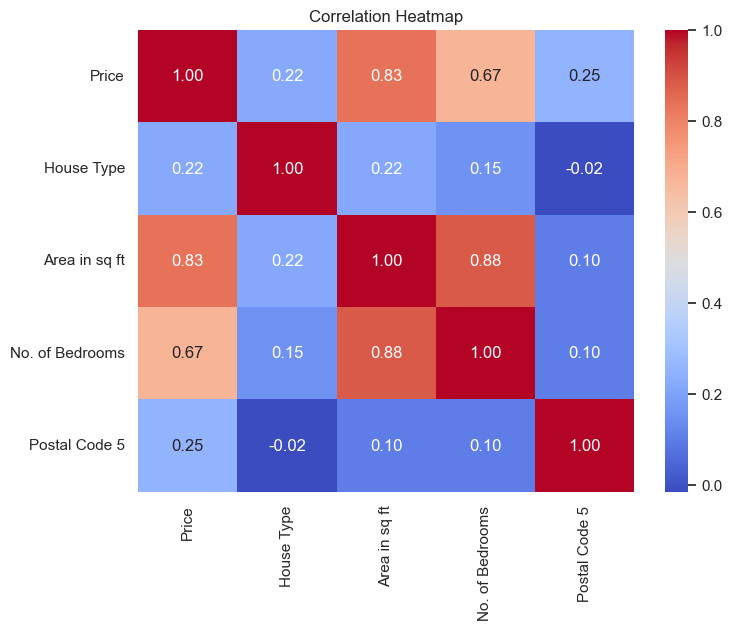

In [41]:
# Compute the correlation matrix
correlation_matrix = models1_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

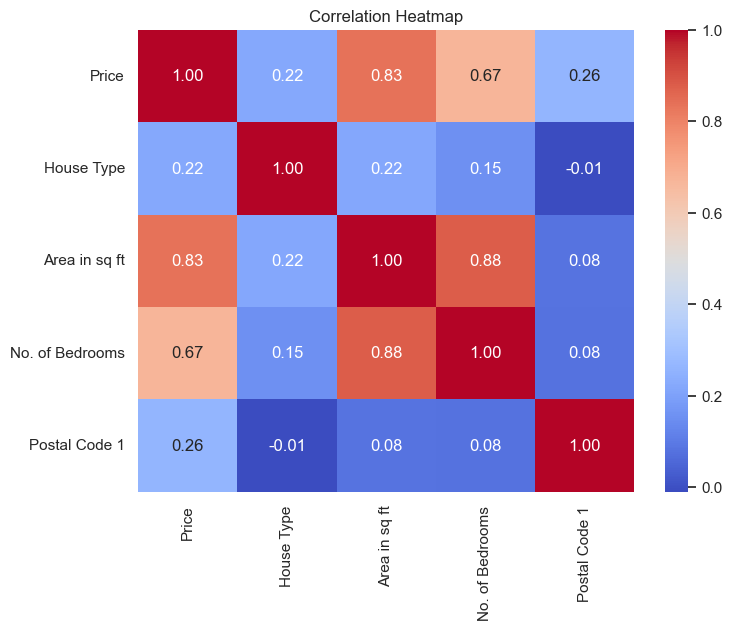

In [42]:
# Compute the correlation matrix
correlation_matrix = models2_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

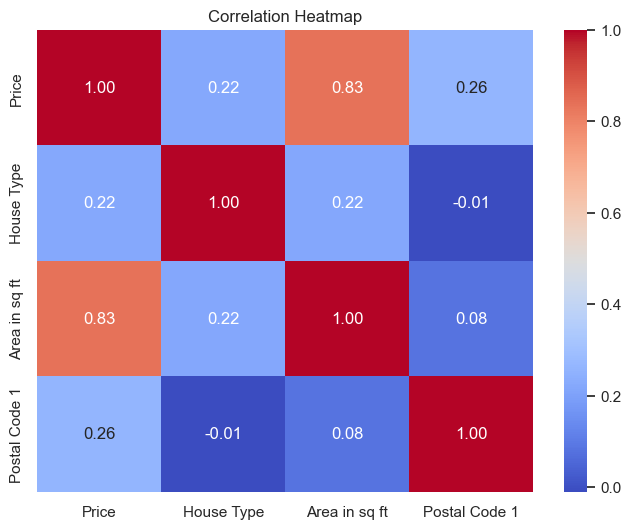

In [43]:
# Compute the correlation matrix
correlation_matrix = models3_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [45]:
X = models1_df.drop(['Price'], axis=1)
y = models1_df['Price']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [47]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [48]:
print(X_train,y_train)

[[ 2.01695001 -0.54138091 -0.06505846  1.16095651]
 [ 0.15360545  0.84106943  1.25219791  1.16095651]
 [-0.77806683 -1.10328007 -0.72368665 -1.9044362 ]
 ...
 [-0.77806683  0.53425465  0.59356973  0.45355819]
 [ 2.94862229  0.26668361  0.59356973  0.45355819]
 [-0.77806683  0.00803162 -0.06505846  0.45355819]] [[-0.41645683]
 [ 0.74262324]
 [-1.015981  ]
 ...
 [ 1.43807128]
 [ 0.23902294]
 [ 0.23102928]]


In [49]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
import numpy as np 
from sklearn import metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [50]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 0.42328627362295596
MSE: 0.28564501204907494
RMSE: 0.5344576803162949


In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [52]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [53]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.44559600969857216
MSE: 0.3548313502202695
RMSE: 0.5956772198265345


In [54]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [55]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.36069143809190346
MSE: 0.22791118117956893
RMSE: 0.4774004411179036


In [56]:
X = models2_df.drop(['Price'], axis=1)
y = models2_df['Price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [58]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [59]:
print(X_train,y_train)

[[ 2.01695001 -0.54138091 -0.06505846  1.65551438]
 [ 0.15360545  0.84106943  1.25219791  1.52235001]
 [-0.77806683 -1.10328007 -0.72368665 -1.62032914]
 ...
 [-0.77806683  0.53425465  0.59356973  0.61683229]
 [ 2.94862229  0.26668361  0.59356973  0.05754193]
 [-0.77806683  0.00803162 -0.06505846  0.05754193]] [[-0.41645683]
 [ 0.74262324]
 [-1.015981  ]
 ...
 [ 1.43807128]
 [ 0.23902294]
 [ 0.23102928]]


In [60]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
import numpy as np 
from sklearn import metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [61]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 0.4145555956775509
MSE: 0.27724066781727347
RMSE: 0.5265364828929459


In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [63]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [64]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.4132466451885234
MSE: 0.3190923329979929
RMSE: 0.5648825833728571


In [65]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [66]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.33124431029694534
MSE: 0.19255178199948364
RMSE: 0.4388072264667979


In [67]:
X = models3_df.drop(['Price'], axis=1)
y = models3_df['Price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [69]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [70]:
print(X_train,y_train)

[[ 2.01695001 -0.54138091  1.65551438]
 [ 0.15360545  0.84106943  1.52235001]
 [-0.77806683 -1.10328007 -1.62032914]
 ...
 [-0.77806683  0.53425465  0.61683229]
 [ 2.94862229  0.26668361  0.05754193]
 [-0.77806683  0.00803162  0.05754193]] [[-0.41645683]
 [ 0.74262324]
 [-1.015981  ]
 ...
 [ 1.43807128]
 [ 0.23902294]
 [ 0.23102928]]


In [71]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm_prediction = lm.predict(X_test)

# Evaluation metrics
import numpy as np 
from sklearn import metrics
mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
mse_lm =  metrics.mean_squared_error(y_test, lm_prediction)
rmse_lm =  np.sqrt(mse_lm)

In [72]:
print('MAE:', mae_lm)
print('MSE:', mse_lm)
print('RMSE:', rmse_lm)

MAE: 0.44154201216383726
MSE: 0.2980585145773145
RMSE: 0.5459473551335463


In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [74]:
dt = DecisionTreeRegressor(random_state = 100)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

# Evaluation metrics
mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
mse_dt =  metrics.mean_squared_error(y_test, dt_prediction)
rmse_dt =  np.sqrt(mse_dt)

In [75]:
print('MAE:', mae_dt)
print('MSE:', mse_dt)
print('RMSE:', rmse_dt)

MAE: 0.418564389889347
MSE: 0.321287053777493
RMSE: 0.5668218889364568


In [76]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

# Evaluation metrics
mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
mse_rf =  metrics.mean_squared_error(y_test, rf_prediction)
rmse_rf =  np.sqrt(mse_rf)

In [77]:
print('MAE:', mae_rf)
print('MSE:', mse_rf)
print('RMSE:', rmse_rf)

MAE: 0.3375637421331657
MSE: 0.1988704796392836
RMSE: 0.44594896528558464
